# Importing libraries

In [379]:
# import libraries

import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# notebook settings 

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', None)
settings :  { "notebook.output.textLineLimit": 9999 }

In [380]:
df = pd.read_csv('pre-processed_new.csv')

df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,weight_class,gender,B_Stance,R_Stance,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,B_match_weightclass_rank,R_match_weightclass_rank,finish,finish_round,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,weight_diff,win_by_decision_diff,days from current date
0,Eric Schafer,Jason Brilz,140.0,-160,140.000000,62.500000,Blue,False,Light Heavyweight,MALE,Orthodox,Orthodox,0,0,0,-1,2,-1,0,0,-2,-10.16,-10.16,-2,16.000000,-0.666667,0.833333,NaN,NaN,U-DEC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,-20,-1,4574
1,Brandon Vera,Jon Jones,215.0,-235,215.000000,42.553191,Blue,False,Light Heavyweight,MALE,Orthodox,Orthodox,0,0,-1,-4,3,-14,0,-4,0,2.54,20.32,10,8.272727,0.159091,1.954545,NaN,NaN,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,25,0,4574
2,Junior Dos Santos,Gabriel Gonzaga,-250.0,230,40.000000,230.000000,Red,False,Heavyweight,MALE,Orthodox,Orthodox,0,-3,0,3,-3,10,1,1,2,-5.08,-2.54,-4,-12.050000,0.700000,1.200000,NaN,NaN,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-4,0,4574
3,Alessio Sakara,James Irvin,-120.0,100,83.333333,100.000000,Red,False,Middleweight,MALE,Orthodox,Orthodox,-1,-2,0,-1,1,-5,0,0,0,5.08,7.62,-3,-15.550000,0.125000,-1.000000,NaN,NaN,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-20,2,4574
4,Mike Pierce,Julio Paulino,-420.0,335,23.809524,335.000000,Red,False,Welterweight,MALE,Orthodox,Orthodox,1,0,-1,-1,1,-6,0,0,0,10.16,7.62,-5,-40.500000,0.000000,-3.500000,NaN,NaN,U-DEC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,4574


In [381]:
# fillna match_weightclass_rank

# for null values >2013 null values will be replaced with rank 16 as they are most likely brand new fighters with no weight class ranking
# for null values before they either need to be dropped or included in the model as they are true nulls since there is not data on them
# for models that can handle nulls I'll include the columns with some data cleaning, but for models that don't have nulls ill drop




In [382]:
df.drop(['R_fighter','B_fighter'],axis=1,inplace=True)

# EDA 

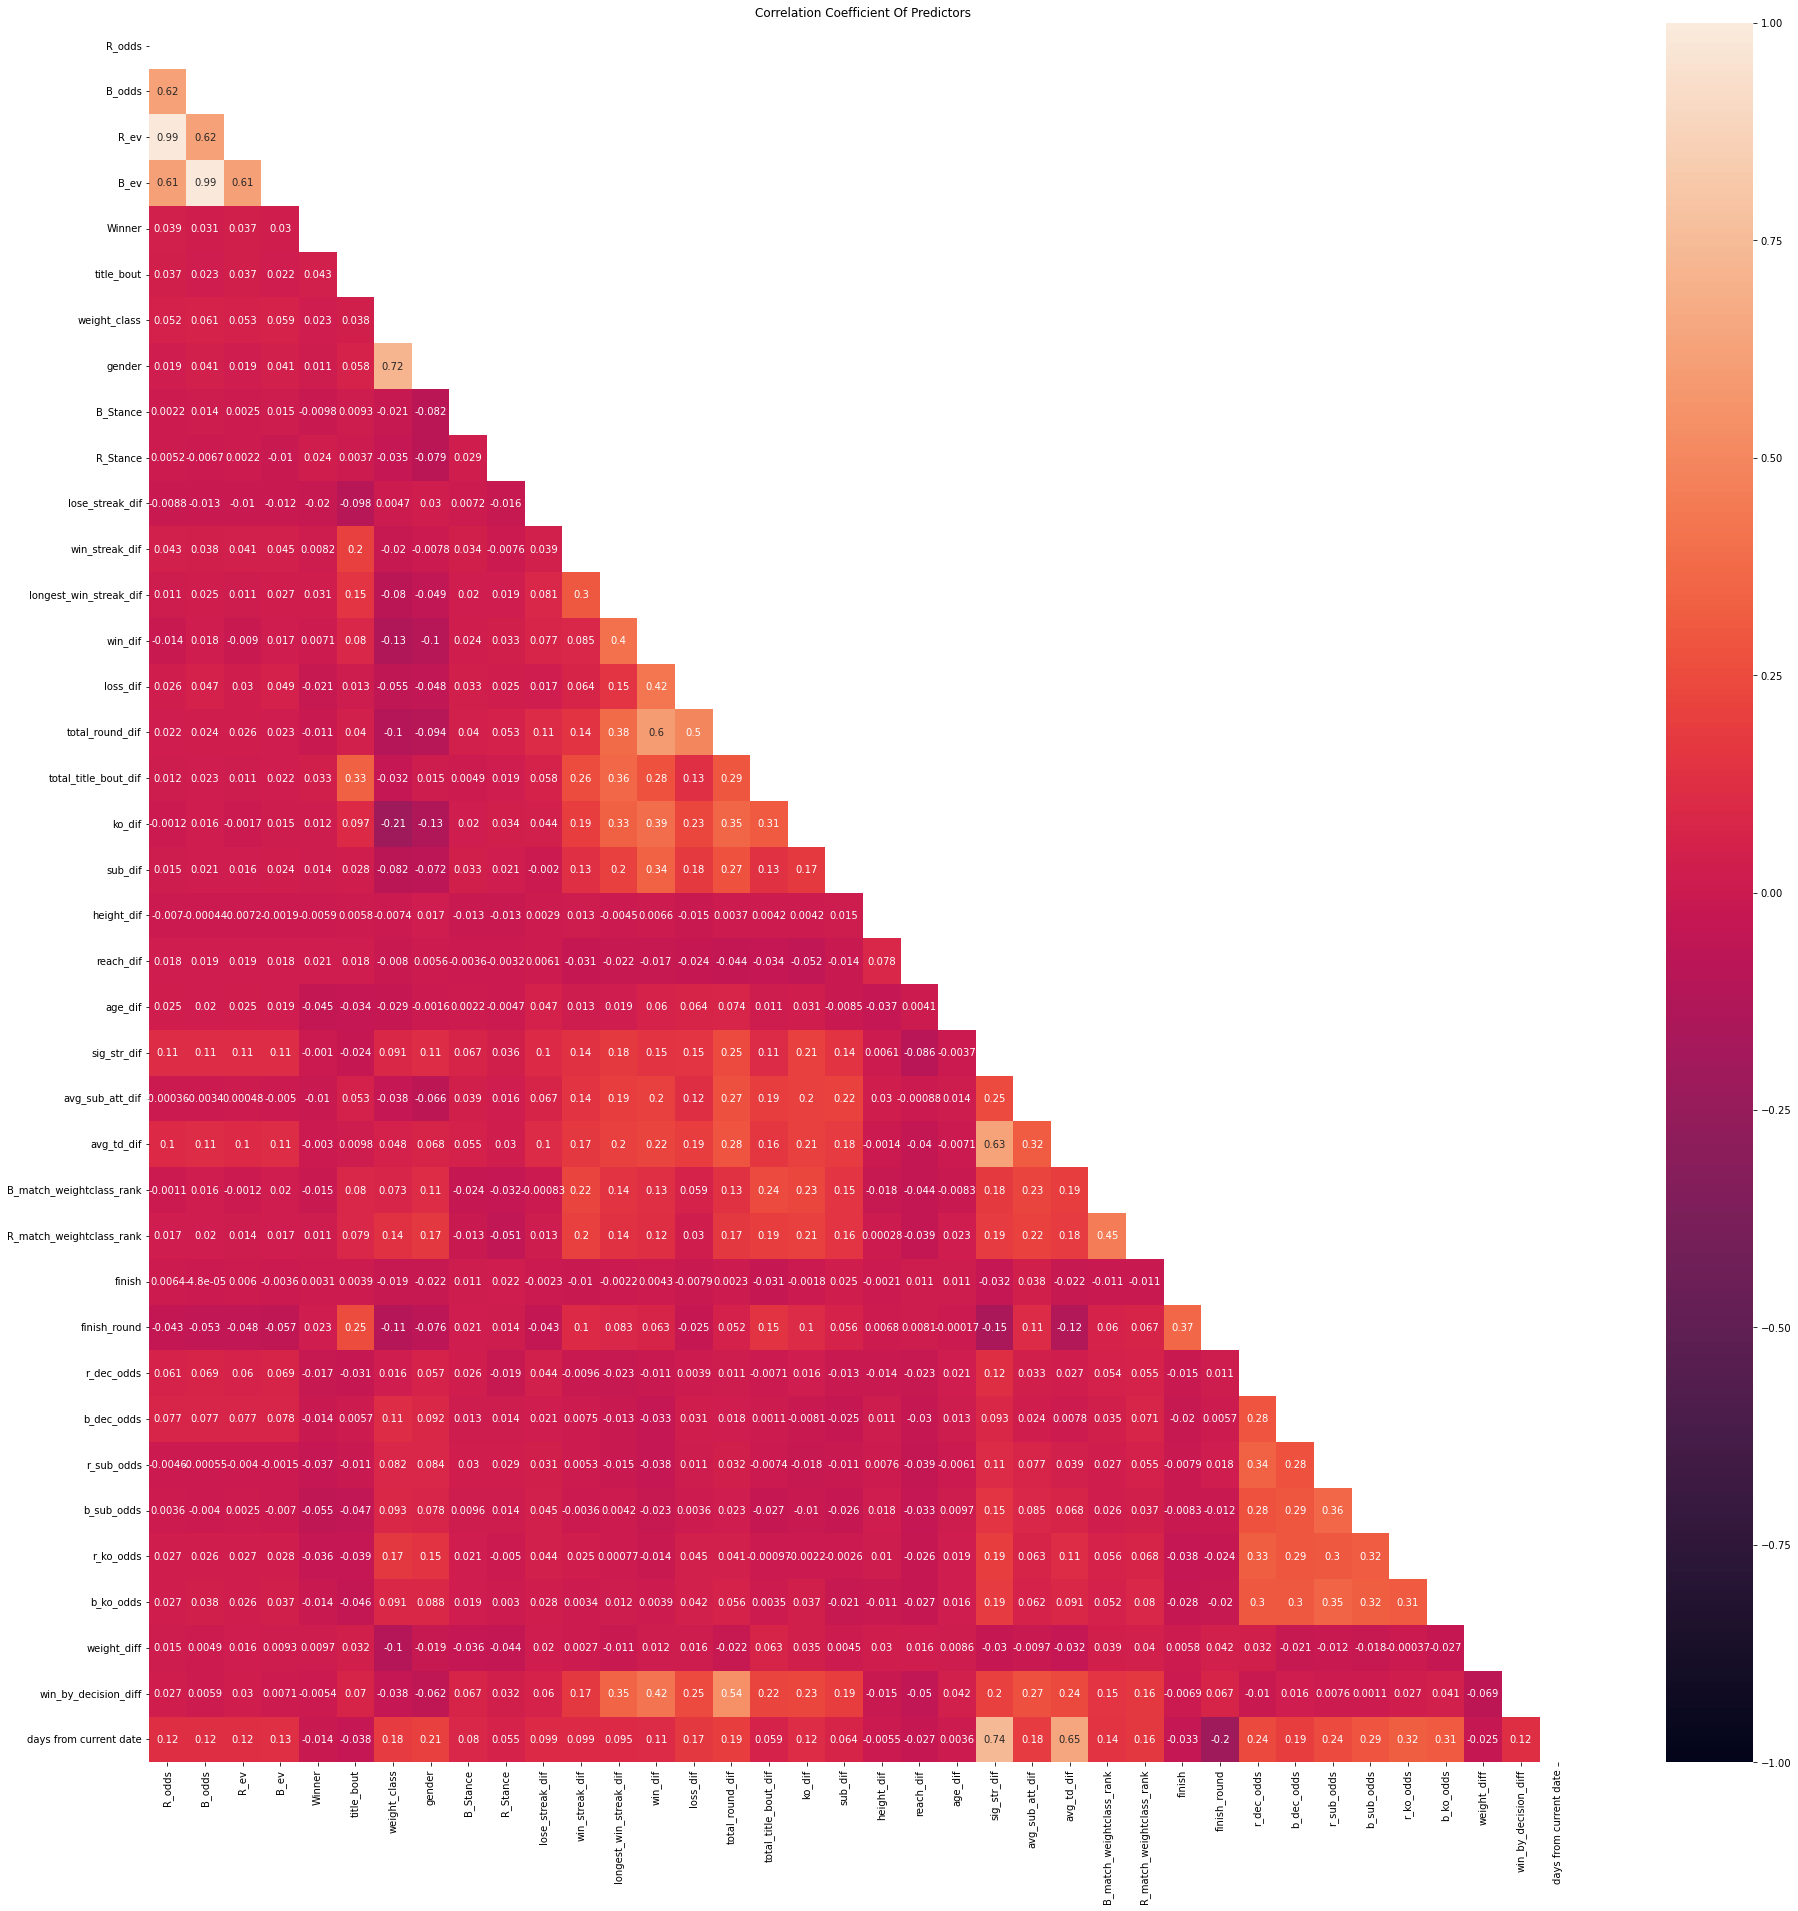

In [383]:
# correlation

# set figure size
plt.figure(figsize=(32,32))

# generate correlation
# use .factorize() to turn categorical variables into numeric in order to properly perform it

correlation = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# generate heatmap
sns.heatmap(correlation, annot=True, mask=mask, vmin=-1, vmax=1)

#sns.heatmap(correlation, annot=True, vmin=-1, vmax=1) # without mask it shows the whole thing

plt.title('Correlation Coefficient Of Predictors')
plt.show()


# Baseline

In [384]:
b_df=df.copy()

In [385]:
df.isnull().sum()

R_odds                         1
B_odds                         0
R_ev                           1
B_ev                           0
Winner                         0
title_bout                     0
weight_class                   0
gender                         0
B_Stance                       2
R_Stance                       0
lose_streak_dif                0
win_streak_dif                 0
longest_win_streak_dif         0
win_dif                        0
loss_dif                       0
total_round_dif                0
total_title_bout_dif           0
ko_dif                         0
sub_dif                        0
height_dif                     0
reach_dif                      0
age_dif                        0
sig_str_dif                    0
avg_sub_att_dif                0
avg_td_dif                     0
B_match_weightclass_rank    3749
R_match_weightclass_rank    3337
finish                       230
finish_round                 612
r_dec_odds                   718
b_dec_odds

In [386]:
# dropping the nulls because there are few

b_df.dropna(subset=['R_odds','R_ev','B_Stance'],axis=0,inplace=True)

In [387]:
# drop column because there is a lto of them

b_df.drop(['B_match_weightclass_rank','R_match_weightclass_rank'],axis=1,inplace=True)

In [388]:
b_df

,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,weight_class,gender,B_Stance,R_Stance,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,finish,finish_round,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,weight_diff,win_by_decision_diff,days from current date
0,140.0,-160,140.000000,62.500000,Blue,False,Light Heavyweight,MALE,Orthodox,Orthodox,0,0,0,-1,2,-1,0,0,-2,-10.16,-10.16,-2,16.000000,-0.666667,0.833333,U-DEC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,-20,-1,4574
1,215.0,-235,215.000000,42.553191,Blue,False,Light Heavyweight,MALE,Orthodox,Orthodox,0,0,-1,-4,3,-14,0,-4,0,2.54,20.32,10,8.272727,0.159091,1.954545,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,25,0,4574
2,-250.0,230,40.000000,230.000000,Red,False,Heavyweight,MALE,Orthodox,Orthodox,0,-3,0,3,-3,10,1,1,2,-5.08,-2.54,-4,-12.050000,0.700000,1.200000,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-4,0,4574
3,-120.0,100,83.333333,100.000000,Red,False,Middleweight,MALE,Orthodox,Orthodox,-1,-2,0,-1,1,-5,0,0,0,5.08,7.62,-3,-15.550000,0.125000,-1.000000,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-20,2,4574
4,-420.0,335,23.809524,335.000000,Red,False,Welterweight,MALE,Orthodox,Orthodox,1,0,-1,-1,1,-6,0,0,0,10.16,7.62,-5,-40.500000,0.000000,-3.500000,U-DEC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,4574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,-280.0,225,35.714286,225.000000,Red,False,Bantamweight,MALE,Orthodox,Orthodox,0,0,-2,-4,-3,-20,0,-1,0,0.00,-7.62,-7,-2.800000,0.000000,-0.690000,KO/TKO,1.0,165.0,450.0,1400.0,2000.0,150.0,600.0,10,3,361
4535,-155.0,135,64.516129,135.000000,Red,False,Women's Bantamweight,FEMALE,Orthodox,Orthodox,1,0,0,0,1,2,0,0,0,2.54,-7.62,-3,1.300000,1.000000,-2.010000,KO/TKO,2.0,140.0,225.0,450.0,900.0,800.0,900.0,0,0,361
4536,-300.0,235,33.333333,235.000000,Red,False,Bantamweight,MALE,Orthodox,Orthodox,0,0,-2,-4,1,-11,0,-1,0,2.54,15.24,11,-0.500000,0.000000,-0.390000,SUB,2.0,250.0,600.0,650.0,900.0,130.0,550.0,10,3,361
4537,215.0,-265,215.000000,37.735849,Blue,False,Women's Flyweight,FEMALE,Orthodox,Southpaw,-1,2,0,-2,-3,-12,0,-1,0,-5.08,5.08,-13,1.590000,0.900000,3.320000,KO/TKO,2.0,300.0,200.0,1600.0,330.0,1000.0,300.0,0,1,361


In [389]:
# get dummies

b_df=pd.get_dummies(b_df, drop_first=True)

In [390]:
b_df[['days from current date','Winner_Red']].groupby('days from current date').count().size

428

In [391]:
# use this data for train test split

b_df[['days from current date','Winner_Red']].groupby('days from current date').count()

,Winner_Red
days from current date,
361,11
368,13
375,12
389,9
396,12
...,...
4526,8
4554,8
4564,9


In [392]:
b_df.shape

(4536, 54)

## Train/test split & target/feature selection

In [393]:
# train test split
# these are days from current date	sensitive so I am using the 5 of the most recent events

test = b_df[(b_df['days from current date'] <600)
    ]

train = b_df[(b_df['days from current date'] >600) ]

In [394]:
target_test = test[['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC']]

target_train = train[['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC']]

In [395]:
# predictor with odds

#might need to drop: 'r_dec_odds', 'b_dec_odds', 'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds'

f_predictor_test = test.drop(['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC'], axis=1, inplace=False)

f_predictor_train = train.drop(['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC'], axis=1, inplace=False)

# predictor with no odds

n_predictor_test = test[['days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw']]

n_predictor_train = train[['days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw']]

## Model

### Winner_red

In [396]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(C=0.5))

pipe.fit(n_predictor_train, target_train['Winner_Red'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.5))])

In [397]:
pipe.score(n_predictor_test, target_test['Winner_Red'])

0.5585585585585585

### xgboost

In [398]:
print(n_predictor_train.shape
)
print(target_train['Winner_Red'].shape)


print(target_test['Winner_Red'].shape)

(4203, 37)
(4203,)
(333,)


In [399]:
xg_reg = xgb.XGBClassifier(learning_rate = 0.1,
                max_depth = 9,n_estimators = 2000, alpha=7)

pipe = make_pipeline(StandardScaler(), xg_reg)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

[22:07:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\lazar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6366366366366366

<AxesSubplot:>

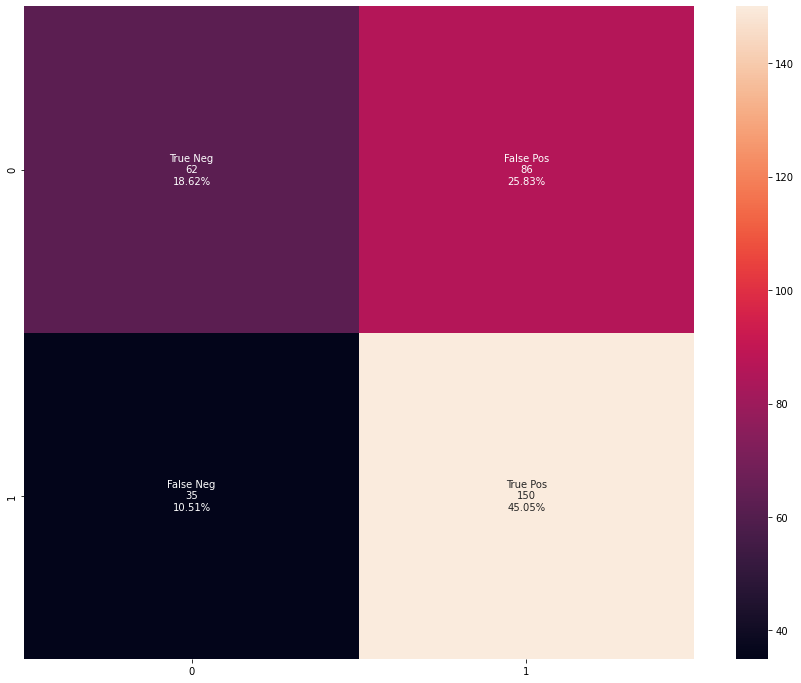

In [400]:

#get predicted target
ypred = pipe.predict(n_predictor_test)

#confusion matrix
cf=confusion_matrix(target_test['Winner_Red'], ypred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(15,12))
sns.heatmap(cf, annot=labels, fmt='')

In [401]:
# it appears that the model is more likely to classify as true that red will win


In [402]:
# testing 

xg_reg = xgb.XGBClassifier(learning_rate = 0.08,
                max_depth = 9,n_estimators = 2500, alpha=10)

pipe = make_pipeline(StandardScaler(), xg_reg)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

c:\Users\lazar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6036036036036037

test stances

In [403]:
temp_n_predictor_test = test[['days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff','gender_MALE']]

temp_n_predictor_train = train[['days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'gender_MALE']]

In [421]:
xg_reg = xgb.XGBClassifier(learning_rate = 0.1,
                max_depth = 6,n_estimators = 2500, alpha=7)

pipe = make_pipeline(StandardScaler(), xg_reg)

pipe.fit(temp_n_predictor_train, target_train['Winner_Red'])

pipe.score(temp_n_predictor_test, target_test['Winner_Red'])

c:\Users\lazar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:08:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6216216216216216

<AxesSubplot:>

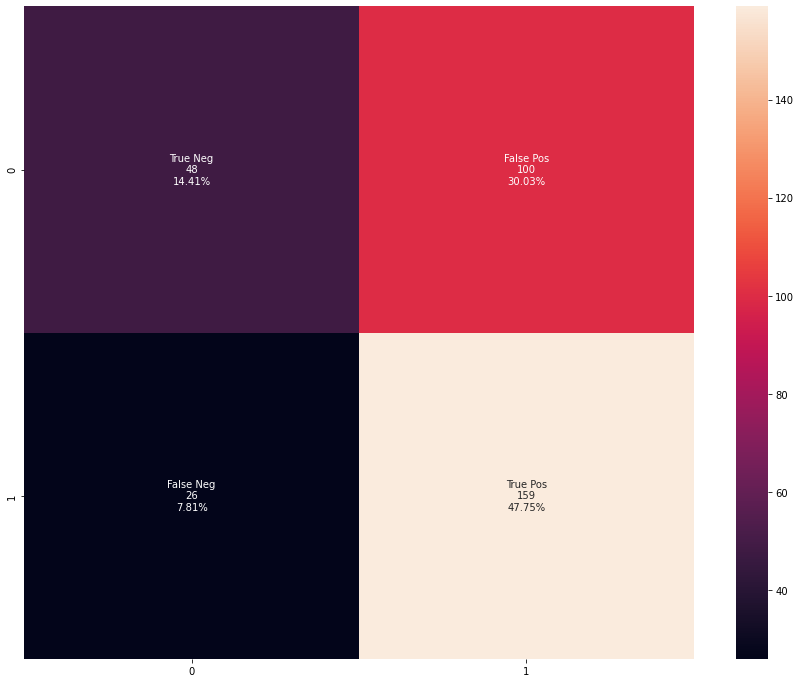

In [422]:
#get predicted target
ypred = pipe.predict(temp_n_predictor_test)

#confusion matrix
cf=confusion_matrix(target_test['Winner_Red'], ypred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(15,12))
sns.heatmap(cf, annot=labels, fmt='')

### Rounds 

In [405]:
# train test split


#dropna
temp = b_df.dropna(subset=['finish_round'])

#train test

test = temp[(temp['days from current date'] < 800)]

train = temp[(temp['days from current date'] > 800)]

# X/Y

X_test = test[['days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw']]

X_train = train[['days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw']]


In [406]:
# model

pipe = make_pipeline(StandardScaler(), linear_model.Lasso(alpha=0.1))

pipe.fit(X_train, train['finish_round'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1))])

In [407]:
pipe.score(X_test, test['finish_round'])

0.021952727197361854

# Random stuff

In [408]:
train.columns

Index(['R_odds', 'B_odds', 'R_ev', 'B_ev', 'title_bout', 'lose_streak_dif',
       'win_streak_dif', 'longest_win_streak_dif', 'win_dif', 'loss_dif',
       'total_round_dif', 'total_title_bout_dif', 'ko_dif', 'sub_dif',
       'height_dif', 'reach_dif', 'age_dif', 'sig_str_dif', 'avg_sub_att_dif',
       'avg_td_dif', 'finish_round', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds', 'weight_diff',
       'win_by_decision_diff', 'days from current date', 'Winner_Red',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women's Bantamweight',
       'weight_class_Women's Featherweight', 'weight_class_Women's Flyweight',
       'weight_class_Women's Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch',

In [409]:
# odds 

'R_odds', 'B_odds', 'R_ev', 'B_ev', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds',



('R_odds',
 'B_odds',
 'R_ev',
 'B_ev',
 'r_dec_odds',
 'b_dec_odds',
 'r_sub_odds',
 'b_sub_odds',
 'r_ko_odds',
 'b_ko_odds')

In [410]:
# should maybe drop this

b_df[['total_title_bout_dif']].describe()

,total_title_bout_dif
count,4536.000000
mean,-0.274471
std,1.492597
min,-14.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.000000


In [411]:
# shouldn't drop this one as there is a mena and all 


b_df[['total_round_dif']].describe()

,total_round_dif
count,4536.000000
mean,-5.089286
std,16.444507
min,-448.000000
25%,-11.000000
50%,-3.000000
75%,2.000000
max,80.000000
